In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

C:\Users\ciullo\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [8]:
res_un_du = pd.read_excel('./damage_results/damages_2m_du.xlsx', index_col = 0)
errors = np.loadtxt('./damage_results/MC_err_msg.txt')
errors = errors.astype(int)
res_un_du = res_un_du.drop(errors)

In [ ]:
N = 4500
events_breach = pd.read_excel('./MC_inputs/events_breach_2m.xlsx', index_col = 0).iloc[:, :N].T
events_breach.index = range(events_breach.shape[0])

events_damage = pd.read_excel('./MC_inputs/events_betas.xlsx', index_col = 0).iloc[:N]
events_damage.columns = ['betas']

In [ ]:
hydro_events = pd.read_excel('./MC_inputs/events_for_PRIM.xlsx', index_col=0)
hydro_events.columns = ['Flood Wave Duration', 'Peak Discharge\nPo River', 'Flood Volume\nPo River', 
                        'Peak Discharge, Panaro', 'Flood Volume, Panaro', 'Peak Discharge, Secchia', 'Flood Volume, Secchia']

In [ ]:
events_un_du = pd.concat([hydro_events, events_breach, events_damage], axis=1)
events_un_du = events_un_du.drop(errors)

In [9]:
new_cols = []
for col in events_un_du.columns[:-1]:
    if isinstance(col, int):
        new_cols.append('Water levels\nstretch #{}'.format(col))
    else:
        new_cols.append(col)

In [10]:
events_un_du.columns = new_cols + ['Damage Model\nRegr. Param.']

# Cros_seccB

In [12]:
outcomes_un_du = res_un_du.loc[:, 'cros_seccB']

cases = (outcomes_un_du > np.quantile(outcomes_un_du, 0.75))
x = events_un_du
x.columns = x.columns.astype(str)
y = cases.values

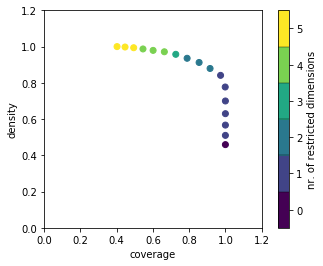

In [13]:
prim_alg = prim.Prim(x.iloc[:,1:], y, threshold=0.8, peel_alpha=0.1)
box_un = prim_alg.find_box()
box_un.show_tradeoff()
plt.show()

In [14]:
box_un.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.459040,0,1.000000,0.459040,0
1,1.000000,0.510071,1,0.899953,0.510071,1
2,1.000000,0.566860,2,0.809793,0.566860,1
3,1.000000,0.629845,3,0.728814,0.629845,1
4,1.000000,0.699928,4,0.655838,0.699928,1
5,0.998974,0.777024,5,0.590160,0.777024,1
6,0.973333,0.841312,6,0.531073,0.841312,1
7,0.915385,0.879310,7,0.477872,0.879310,2
8,0.854872,0.912425,8,0.430085,0.912425,2
9,0.788718,0.935523,9,0.387006,0.935523,2


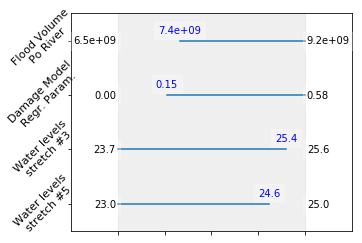

In [15]:
box_un.inspect(11, style='graph', rotation = 45, table = False, size=11)
plt.show()

In [18]:
df

box 11                \
                                     min           max   
Water levels\nstretch #5    2.300049e+01  2.461792e+01   
Water levels\nstretch #3    2.365049e+01  2.544663e+01   
Damage Model\nRegr. Param.  1.507718e-01  5.766488e-01   
Flood Volume\nPo River      7.426645e+09  9.215649e+09   

                                                             
                                                  qp values  
Water levels\nstretch #5      [-1.0, 5.873372908597395e-17]  
Water levels\nstretch #3      [-1.0, 0.0047341289498143615]  
Damage Model\nRegr. Param.  [1.0202765575087246e-303, -1.0]  
Flood Volume\nPo River        [2.002186869678974e-05, -1.0]

In [19]:
resampled_stats = box_un.resample(11, iterations = 500)

In [20]:
resampled_stats.head()

,reproduce coverage,reproduce density
Water levels\nstretch #5,100.0,100.0
Damage Model\nRegr. Param.,100.0,100.0
Flood Volume\nPo River,82.8,81.6
Water levels\nstretch #3,53.2,44.4
Water levels\nstretch #4,13.2,11.4


In [21]:
df['reproduced coverage'] = resampled_stats.loc[df.index, ['reproduce coverage']]
df['reproduced density'] = resampled_stats.loc[df.index, ['reproduce density']]
df

box 11                \
                                     min           max   
Water levels\nstretch #5    2.300049e+01  2.461792e+01   
Water levels\nstretch #3    2.365049e+01  2.544663e+01   
Damage Model\nRegr. Param.  1.507718e-01  5.766488e-01   
Flood Volume\nPo River      7.426645e+09  9.215649e+09   

                                                             \
                                                  qp values   
Water levels\nstretch #5      [-1.0, 5.873372908597395e-17]   
Water levels\nstretch #3      [-1.0, 0.0047341289498143615]   
Damage Model\nRegr. Param.  [1.0202765575087246e-303, -1.0]   
Flood Volume\nPo River        [2.002186869678974e-05, -1.0]   

                           reproduced coverage reproduced density  
                                                                   
Water levels\nstretch #5                 100.0              100.0  
Water levels\nstretch #3                  53.2               44.4  
Damage Model\nRegr. Param.               100.0              100.0  
Flood Volume\nPo River                    82.8               81.6

# Cros_seccC

In [23]:
outcomes_un_du = res_un_du.loc[:, 'cros_seccC']

cases = (outcomes_un_du > np.quantile(outcomes_un_du, 0.75))
x = events_un_du
x.columns = x.columns.astype(str)
y = cases.values

prim_alg = prim.Prim(x.iloc[:,1:], y, threshold=0.8, peel_alpha=0.1)
box_un = prim_alg.find_box()

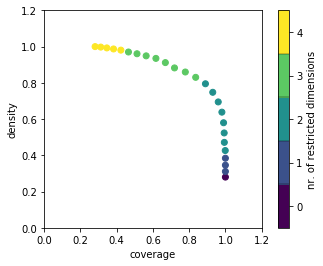

In [24]:
box_un.show_tradeoff()
plt.show()

In [70]:
box_un.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.279896,0,1.000000,0.279896,0
1,1.000000,0.311012,1,0.899953,0.311012,1
2,1.000000,0.345640,2,0.809793,0.345640,1
3,1.000000,0.384044,3,0.728814,0.384044,1
4,0.999159,0.426418,4,0.655838,0.426418,2
5,0.994113,0.471480,5,0.590160,0.471480,2
6,0.993272,0.523493,6,0.531073,0.523493,2
7,0.989907,0.579803,7,0.477872,0.579803,2
8,0.980656,0.638205,8,0.430085,0.638205,2
9,0.960471,0.694647,9,0.387006,0.694647,2


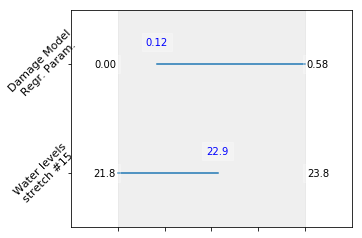

In [71]:
box_un.inspect(11, style='graph', rotation = 45, table = False, size=11)
plt.show()

In [73]:
df

box 11             \
                                  min        max   
Water levels\nstretch #15   21.830488  22.895674   
Damage Model\nRegr. Param.   0.120070   0.576649   

                                                             
                                                  qp values  
Water levels\nstretch #15   [-1.0, 1.0886789869527162e-142]  
Damage Model\nRegr. Param.   [9.020292408844582e-117, -1.0]

In [74]:
resampled_stats = box_un.resample(11, iterations = 500)

In [75]:
resampled_stats.head()

,reproduce coverage,reproduce density
Water levels\nstretch #15,100.0,100.0
Damage Model\nRegr. Param.,100.0,100.0
Flood Volume\nPo River,16.8,22.8
Peak Discharge\nPo River,0.0,0.0
"Peak Discharge, Panaro",0.0,0.0


In [76]:
df['reproduced coverage'] = resampled_stats.loc[df.index, ['reproduce coverage']]
df['reproduced density'] = resampled_stats.loc[df.index, ['reproduce density']]
df

box 11             \
                                  min        max   
Water levels\nstretch #15   21.830488  22.895674   
Damage Model\nRegr. Param.   0.120070   0.576649   

                                                             \
                                                  qp values   
Water levels\nstretch #15   [-1.0, 1.0886789869527162e-142]   
Damage Model\nRegr. Param.   [9.020292408844582e-117, -1.0]   

                           reproduced coverage reproduced density  
                                                                   
Water levels\nstretch #15                100.0              100.0  
Damage Model\nRegr. Param.               100.0              100.0

# Ogli_mincC

In [ ]:
outcomes_un_du = res_un_du.loc[:, 'ogli_mincC']


cases = (outcomes_un_du > np.quantile(outcomes_un_du, 0.75))
x = events_un_du
x.columns = x.columns.astype(str)
y = cases.values

prim_alg = prim.Prim(x.iloc[:, 1:], y, threshold=0.8, peel_alpha=0.1)
box_un = prim_alg.find_box()

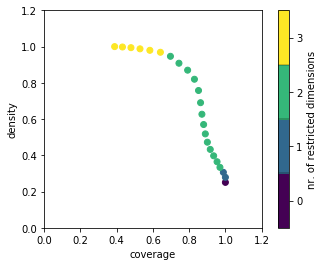

In [ ]:
box_un.show_tradeoff()
plt.show()

In [ ]:
box_un.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.250706,0,1.000000,0.250706,0
1,1.000000,0.278577,1,0.899953,0.278577,1
2,0.988732,0.306105,2,0.809793,0.306105,1
3,0.969953,0.333656,3,0.728814,0.333656,2
4,0.953991,0.364681,4,0.655838,0.364681,2
5,0.935211,0.397288,5,0.590160,0.397288,2
6,0.916432,0.432624,6,0.531073,0.432624,2
7,0.900469,0.472414,7,0.477872,0.472414,2
8,0.889202,0.518336,8,0.430085,0.518336,2
9,0.879812,0.569951,9,0.387006,0.569951,2


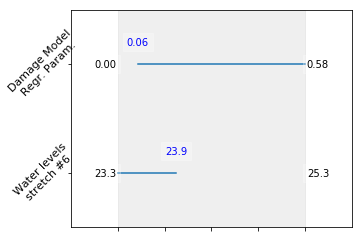

In [ ]:
box_un.inspect(13, style='graph', rotation = 45, table = False, size=11)
plt.show()

In [ ]:
df

box 13             \
                                  min        max   
Water levels\nstretch #6    23.300488  23.922681   
Damage Model\nRegr. Param.   0.061224   0.576649   

                                                             
                                                  qp values  
Water levels\nstretch #6    [-1.0, 2.2792234720619984e-266]  
Damage Model\nRegr. Param.    [3.927758817006367e-27, -1.0]

In [ ]:
resampled_stats = box_un.resample(13, iterations = 500)

In [ ]:
resampled_stats.head()

,reproduce coverage,reproduce density
Water levels\nstretch #6,100.0,100.0
Damage Model\nRegr. Param.,100.0,100.0
Peak Discharge\nPo River,0.4,0.2
Flood Volume\nPo River,0.0,0.0
"Peak Discharge, Panaro",0.0,0.0


In [ ]:
df['reproduced coverage'] = resampled_stats.loc[df.index, ['reproduce coverage']]
df['reproduced density'] = resampled_stats.loc[df.index, ['reproduce density']]
df

box 13             \
                                  min        max   
Water levels\nstretch #6    23.300488  23.922681   
Damage Model\nRegr. Param.   0.061224   0.576649   

                                                             \
                                                  qp values   
Water levels\nstretch #6    [-1.0, 2.2792234720619984e-266]   
Damage Model\nRegr. Param.    [3.927758817006367e-27, -1.0]   

                           reproduced coverage reproduced density  
                                                                   
Water levels\nstretch #6                 100.0              100.0  
Damage Model\nRegr. Param.               100.0              100.0

# Secc_panaA

In [29]:
outcomes_un_du = res_un_du.loc[:, 'secc_panaA']

cases = (outcomes_un_du > np.quantile(outcomes_un_du, 0.75))
x = events_un_du
x.columns = x.columns.astype(str)
y = cases.values

prim_alg = prim.Prim(x.iloc[:, 1:], y, threshold=0.8, peel_alpha=0.1)
box_un = prim_alg.find_box()

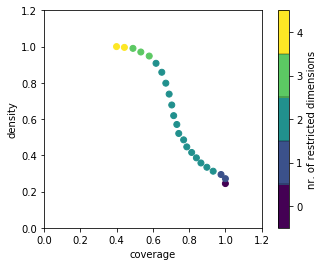

In [32]:
box_un.show_tradeoff()
plt.show()

In [31]:
box_un.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.244115,0,1.000000,0.244115,0
1,1.000000,0.271253,1,0.899953,0.271253,1
2,0.975892,0.294186,2,0.809793,0.294186,1
3,0.932498,0.312339,3,0.728814,0.312339,2
4,0.897782,0.334171,4,0.655838,0.334171,2
5,0.864995,0.357798,5,0.590160,0.357798,2
6,0.839923,0.386082,6,0.531073,0.386082,2
7,0.813886,0.415764,7,0.477872,0.415764,2
8,0.786885,0.446634,8,0.430085,0.446634,2
9,0.769527,0.485401,9,0.387006,0.485401,2


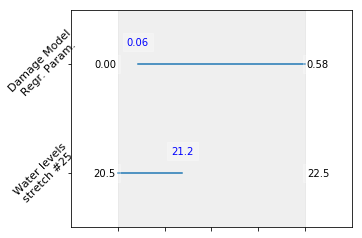

In [104]:
box_un.inspect(12, style='graph', rotation = 45, table = False, size=11)
plt.show()

In [106]:
df

box 12             \
                                  min        max   
Water levels\nstretch #25   20.500244  21.191284   
Damage Model\nRegr. Param.   0.061224   0.576649   

                                                             
                                                  qp values  
Water levels\nstretch #25   [-1.0, 1.6253289785909092e-119]  
Damage Model\nRegr. Param.   [1.9436158799004552e-12, -1.0]

In [107]:
resampled_stats = box_un.resample(12, iterations = 500)

In [108]:
resampled_stats.head()

,reproduce coverage,reproduce density
Damage Model\nRegr. Param.,100.0,100.0
Water levels\nstretch #25,99.8,99.8
Peak Discharge\nPo River,13.2,13.4
Water levels\nstretch #15,0.6,0.6
Water levels\nstretch #19,0.4,0.4


In [109]:
df['reproduced coverage'] = resampled_stats.loc[df.index, ['reproduce coverage']]
df['reproduced density'] = resampled_stats.loc[df.index, ['reproduce density']]
df

box 12             \
                                  min        max   
Water levels\nstretch #25   20.500244  21.191284   
Damage Model\nRegr. Param.   0.061224   0.576649   

                                                             \
                                                  qp values   
Water levels\nstretch #25   [-1.0, 1.6253289785909092e-119]   
Damage Model\nRegr. Param.   [1.9436158799004552e-12, -1.0]   

                           reproduced coverage reproduced density  
                                                                   
Water levels\nstretch #25                 99.8               99.8  
Damage Model\nRegr. Param.               100.0              100.0

# Ogli_mincB

In [ ]:
outcomes_un_du = res_un_du.loc[:, 'ogli_mincB']

cases = (outcomes_un_du > np.quantile(outcomes_un_du, 0.75))
x = events_un_du
x.columns = x.columns.astype(str)
y = cases.values

prim_alg = prim.Prim(x.iloc[:, 1:], y, threshold=0.8, peel_alpha=0.1)
box_un = prim_alg.find_box()

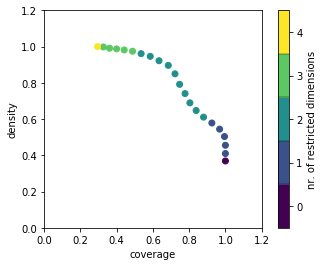

In [ ]:
box_un.show_tradeoff()
plt.show()

In [ ]:
box_un.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.368879,0,1.000000,0.368879,0
1,1.000000,0.409888,1,0.899953,0.409888,1
2,1.000000,0.455523,2,0.809793,0.455523,1
3,0.994895,0.503553,3,0.728814,0.503553,1
4,0.968092,0.544508,4,0.655838,0.544508,1
5,0.925335,0.578381,5,0.590160,0.578381,1
6,0.879387,0.610816,6,0.531073,0.610816,2
7,0.838545,0.647291,7,0.477872,0.647291,2
8,0.804084,0.689655,8,0.430085,0.689655,2
9,0.777281,0.740876,9,0.387006,0.740876,2


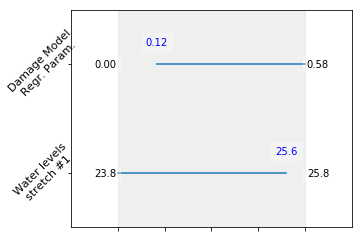

In [ ]:
box_un.inspect(6, style='graph', rotation = 45, table = False, size=11)
plt.show()

In [ ]:
df

box 6             \
                                  min        max   
Water levels\nstretch #1    23.800488  25.602490   
Damage Model\nRegr. Param.   0.120312   0.576649   

                                                           
                                                qp values  
Water levels\nstretch #1     [-1.0, 0.000938317538155503]  
Damage Model\nRegr. Param.  [2.227497422911927e-99, -1.0]

In [ ]:
resampled_stats = box_un.resample(6, iterations = 500)

In [ ]:
resampled_stats.head()

,reproduce coverage,reproduce density
Damage Model\nRegr. Param.,100.0,100.0
Water levels\nstretch #1,89.6,82.2
Water levels\nstretch #0,0.2,0.2
Flood Volume\nPo River,0.0,0.2
Peak Discharge\nPo River,0.0,0.0


In [ ]:
df['reproduced coverage'] = resampled_stats.loc[df.index, ['reproduce coverage']]
df['reproduced density'] = resampled_stats.loc[df.index, ['reproduce density']]
df

box 6             \
                                  min        max   
Water levels\nstretch #1    23.800488  25.602490   
Damage Model\nRegr. Param.   0.120312   0.576649   

                                                          reproduced coverage  \
                                                qp values                       
Water levels\nstretch #1     [-1.0, 0.000938317538155503]                89.6   
Damage Model\nRegr. Param.  [2.227497422911927e-99, -1.0]               100.0   

                           reproduced density  
                                               
Water levels\nstretch #1                 82.2  
Damage Model\nRegr. Param.              100.0